In [1]:
# import the needed libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib 


In [2]:
# create a MultiDiGraph
G = nx.MultiDiGraph()

In [3]:
# load in the data
input_data = './input/data.tsv'
data = pd.read_csv(input_data, sep='\t')
data.head()

,symbol,overallAssociationScore,geneticAssociations,somaticMutations,drugs,pathwaysSystemsBiology,textMining,rnaExpression,animalModels,targetName
0,SLC6A2,0.605935,No data,No data,0.6040872459884047,No data,0.03695798546847018,No data,No data,solute carrier family 6 member 2
1,SLC6A4,0.605472,No data,No data,0.6040991203885059,No data,0.02744951709599876,No data,No data,solute carrier family 6 member 4
2,CACNA2D1,0.602479,No data,No data,0.6024789602067924,No data,No data,No data,No data,calcium voltage-gated channel auxiliary subuni...
3,HTR2A,0.559159,No data,No data,0.5546461928861836,No data,0.09024626746046689,No data,No data,5-hydroxytryptamine receptor 2A
4,HTR2C,0.554646,No data,No data,0.5546461928861836,No data,No data,No data,No data,5-hydroxytryptamine receptor 2C


In [4]:
data_frame = pd.DataFrame(data)
data_frame.head(12)

,symbol,overallAssociationScore,geneticAssociations,somaticMutations,drugs,pathwaysSystemsBiology,textMining,rnaExpression,animalModels,targetName
0,SLC6A2,0.605935,No data,No data,0.6040872459884047,No data,0.03695798546847018,No data,No data,solute carrier family 6 member 2
1,SLC6A4,0.605472,No data,No data,0.6040991203885059,No data,0.02744951709599876,No data,No data,solute carrier family 6 member 4
2,CACNA2D1,0.602479,No data,No data,0.6024789602067924,No data,No data,No data,No data,calcium voltage-gated channel auxiliary subuni...
3,HTR2A,0.559159,No data,No data,0.5546461928861836,No data,0.09024626746046689,No data,No data,5-hydroxytryptamine receptor 2A
4,HTR2C,0.554646,No data,No data,0.5546461928861836,No data,No data,No data,No data,5-hydroxytryptamine receptor 2C
5,DRD2,0.517473,No data,No data,0.5126688550901288,No data,0.09609076221802247,No data,No data,dopamine receptor D2
6,OPRM1,0.453735,No data,No data,0.450045601935221,No data,0.07378341244824477,No data,No data,opioid receptor mu 1
7,GABBR2,0.396805,No data,No data,0.3968047966145921,No data,No data,No data,No data,gamma-aminobutyric acid type B receptor subunit 2
8,GABBR1,0.396805,No data,No data,0.3968047966145921,No data,No data,No data,No data,gamma-aminobutyric acid type B receptor subunit 1
9,OPRD1,0.396272,No data,No data,0.39627173307859687,No data,No data,No data,No data,opioid receptor delta 1


In [5]:
# symbols
print(data_frame['symbol'].tolist())


['SLC6A2', 'SLC6A4', 'CACNA2D1', 'HTR2A', 'HTR2C', 'DRD2', 'OPRM1', 'GABBR2', 'GABBR1', 'OPRD1', 'OPRK1', 'CACNA2D2', 'SNAP25', 'PTGS2', 'CALCR', 'SLC6A3', 'SCN9A', 'SCN11A', 'SCN10A', 'SCN4A', 'SCN8A', 'SCN7A', 'SCN3A', 'SCN1A', 'SCN2A', 'SCN5A', 'GRIN2A', 'HTR3A', 'GRIN2B', 'GRIN2C', 'GRIN1', 'GHR', 'GRIN3B', 'GRIN3A', 'HRH1', 'GRIN2D', 'ELOVL6', 'ERBB4', 'EGF', 'DRD4', 'DRD3', 'DDC', 'ADRA2C', 'ADRA2A', 'GHSR', 'ADRA2B', 'GALNT17', 'ADRB2', 'ADRB1', 'AUTS2', 'COMT', 'ADRA1A', 'CALCA', 'ADRB3', 'ADRA1B', 'ADRA1D', 'ACHE', 'CNR1', 'SIGMAR1', 'CALCB', 'MTNR1B', 'MTNR1A', 'BDNF', 'ENPP2', 'NGF', 'CCL2', 'ENPEP', 'APOC1', 'GH1', 'NR3C1', 'LEP', 'TBPL1', 'TYRP1', 'TNF', 'IGF1', 'SERPINA1', 'RRH', 'FMOD', 'CSF1R', 'LRIT3', 'CRP', 'CXCL8', 'ASIC3', 'GGH', 'TGM2', 'INS', 'MEFV', 'FMR1', 'CRH', 'TRPV1', 'GSTM1', 'NPY', 'BTG3', 'IL6', 'TSPO', 'POMC', 'S100B', 'ACE', 'CCL24', 'IL17A', 'TAC1', 'PREP', 'IL2', 'ADIPOQ', 'CYP2D6', 'GHRL', 'IL6ST', 'HP', 'MTHFR', 'HTR3B', 'CX3CL1', 'MAOA', 'LPAR1', 

In [6]:
print(list(data_frame.columns))

['symbol', 'overallAssociationScore', 'geneticAssociations', 'somaticMutations', 'drugs', 'pathwaysSystemsBiology', 'textMining', 'rnaExpression', 'animalModels', 'targetName']


In [7]:
# Add nodes to the graph
for _, row in data_frame.iterrows():
    G.add_node(row['symbol'], overallAssociationScore=row['overallAssociationScore'])
    G.add_node(row['targetName'])

    # Add edges for non-empty columns
    for col in data_frame.columns:
        if col in ['symbol', 'targetName']:
            continue
        value = row[col]
        if isinstance(value, str):
            values = value.split(';')  
            for v in values:
                if v:
                    G.add_edge(row['symbol'], v, association_type=col)

# Print the graph
# print(G.edges(data=True))


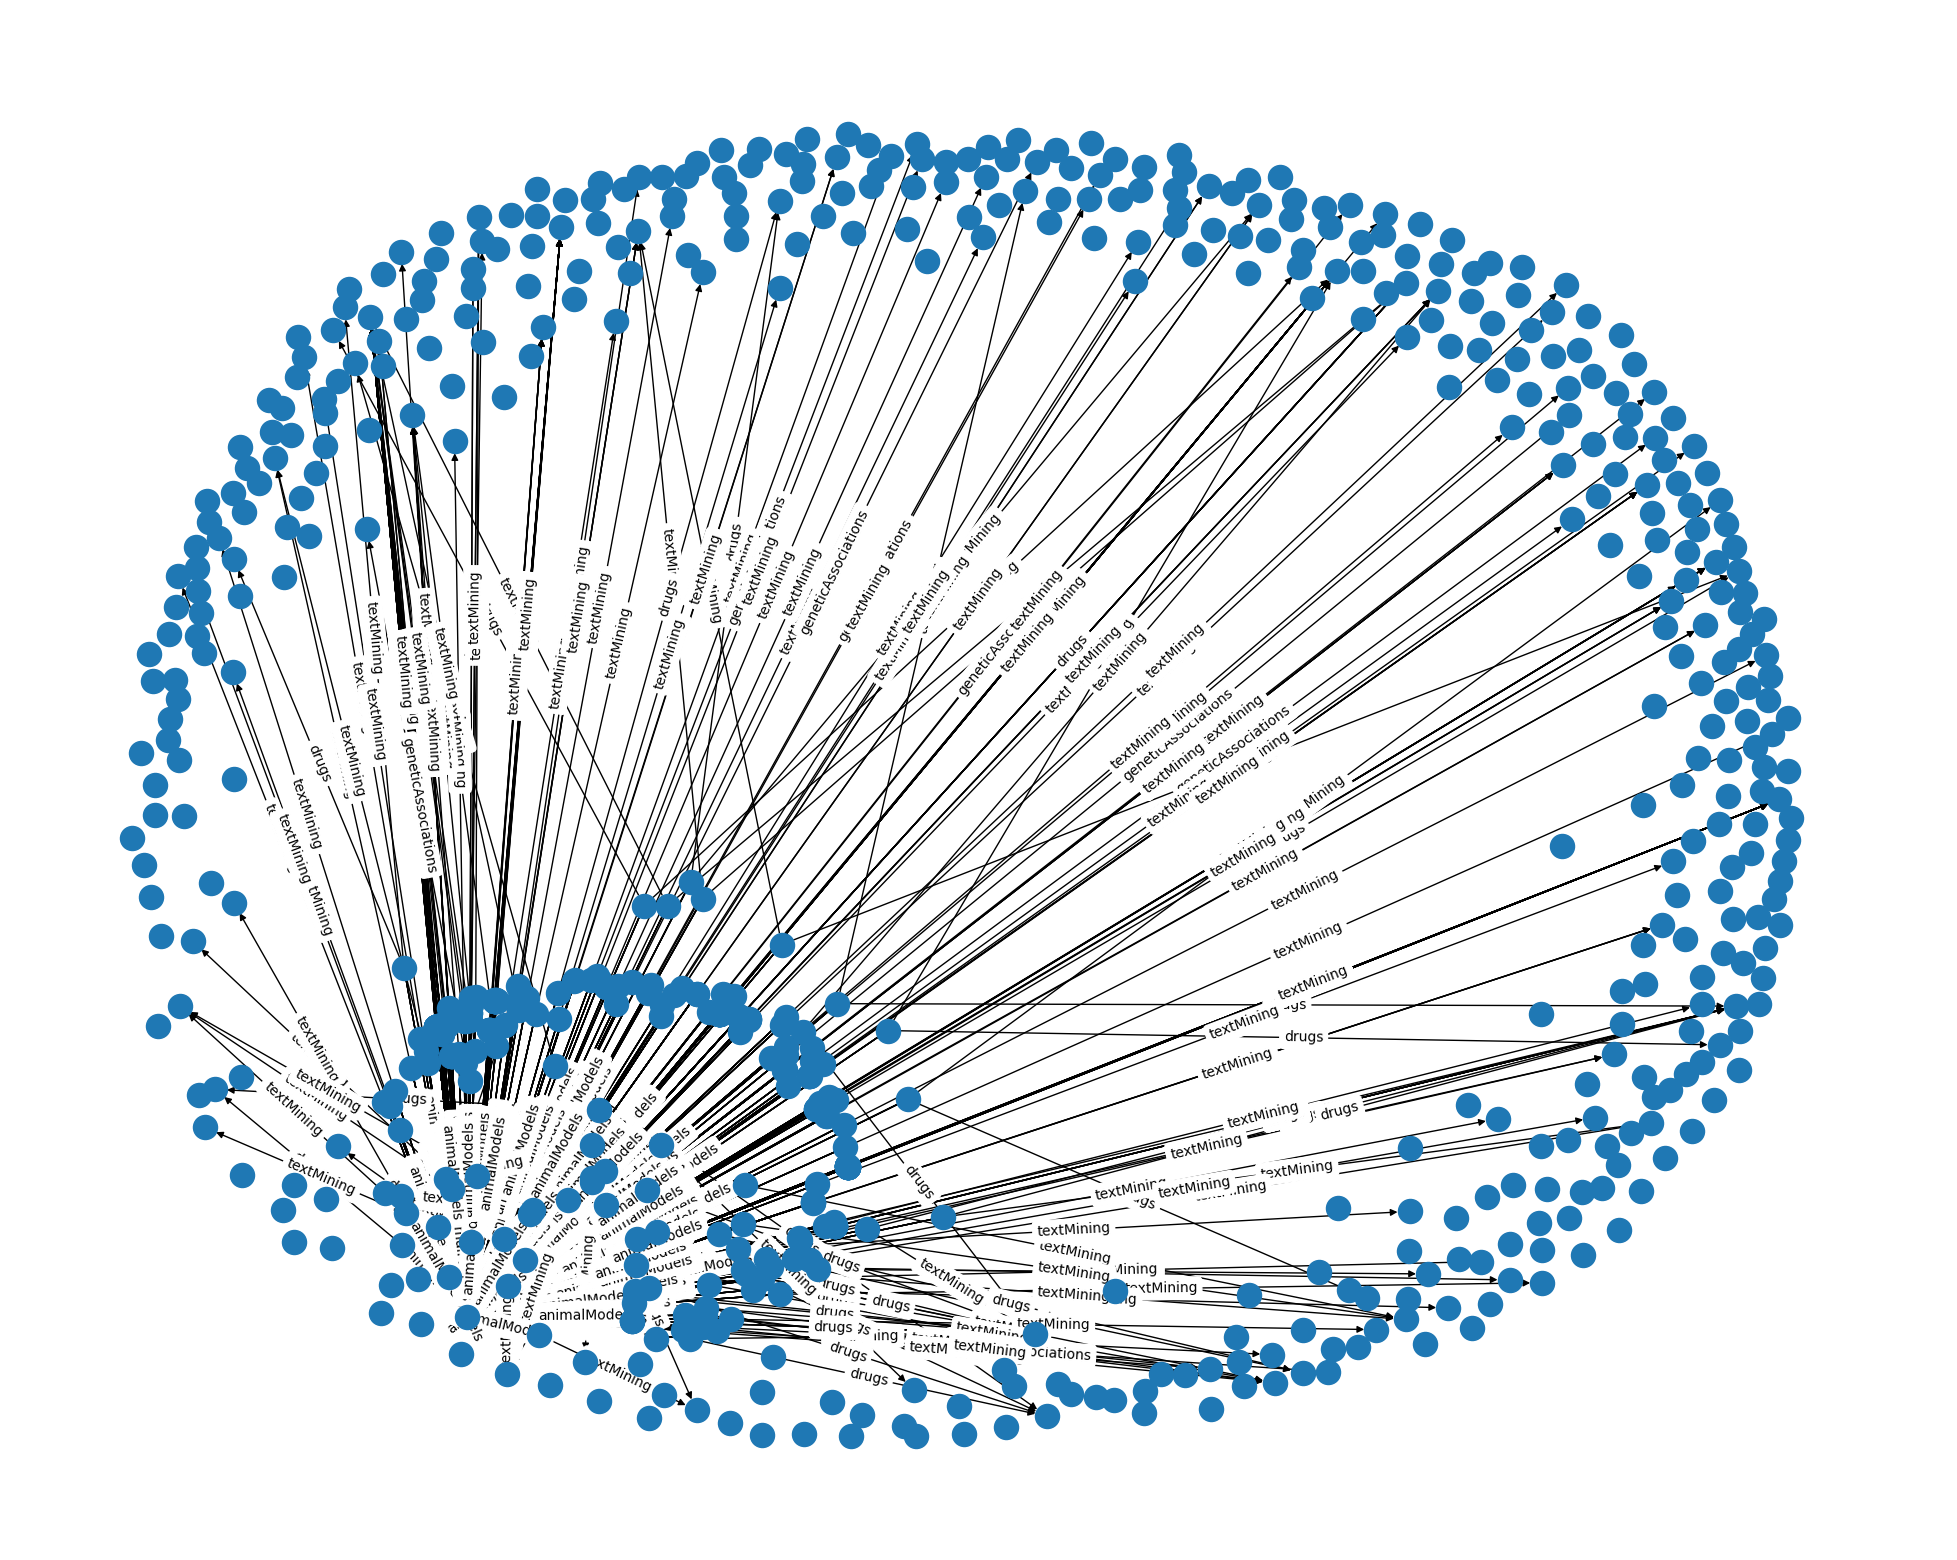

In [8]:
# without centrality
fig, ax = plt.subplots(figsize=(25, 20))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(
    u, v): d['association_type'] for u, v, d in G.edges(data=True)})
ax.axis('off')
plt.show()


In [9]:
# Calculate betweenness centrality for each node
betweenness = nx.betweenness_centrality(G, normalized=True)
# betweenness

In [10]:
# Calculate degree for each node
degree = dict(G.degree())


In [11]:
# Get the plasma colormap
cmap = matplotlib.colormaps['plasma']


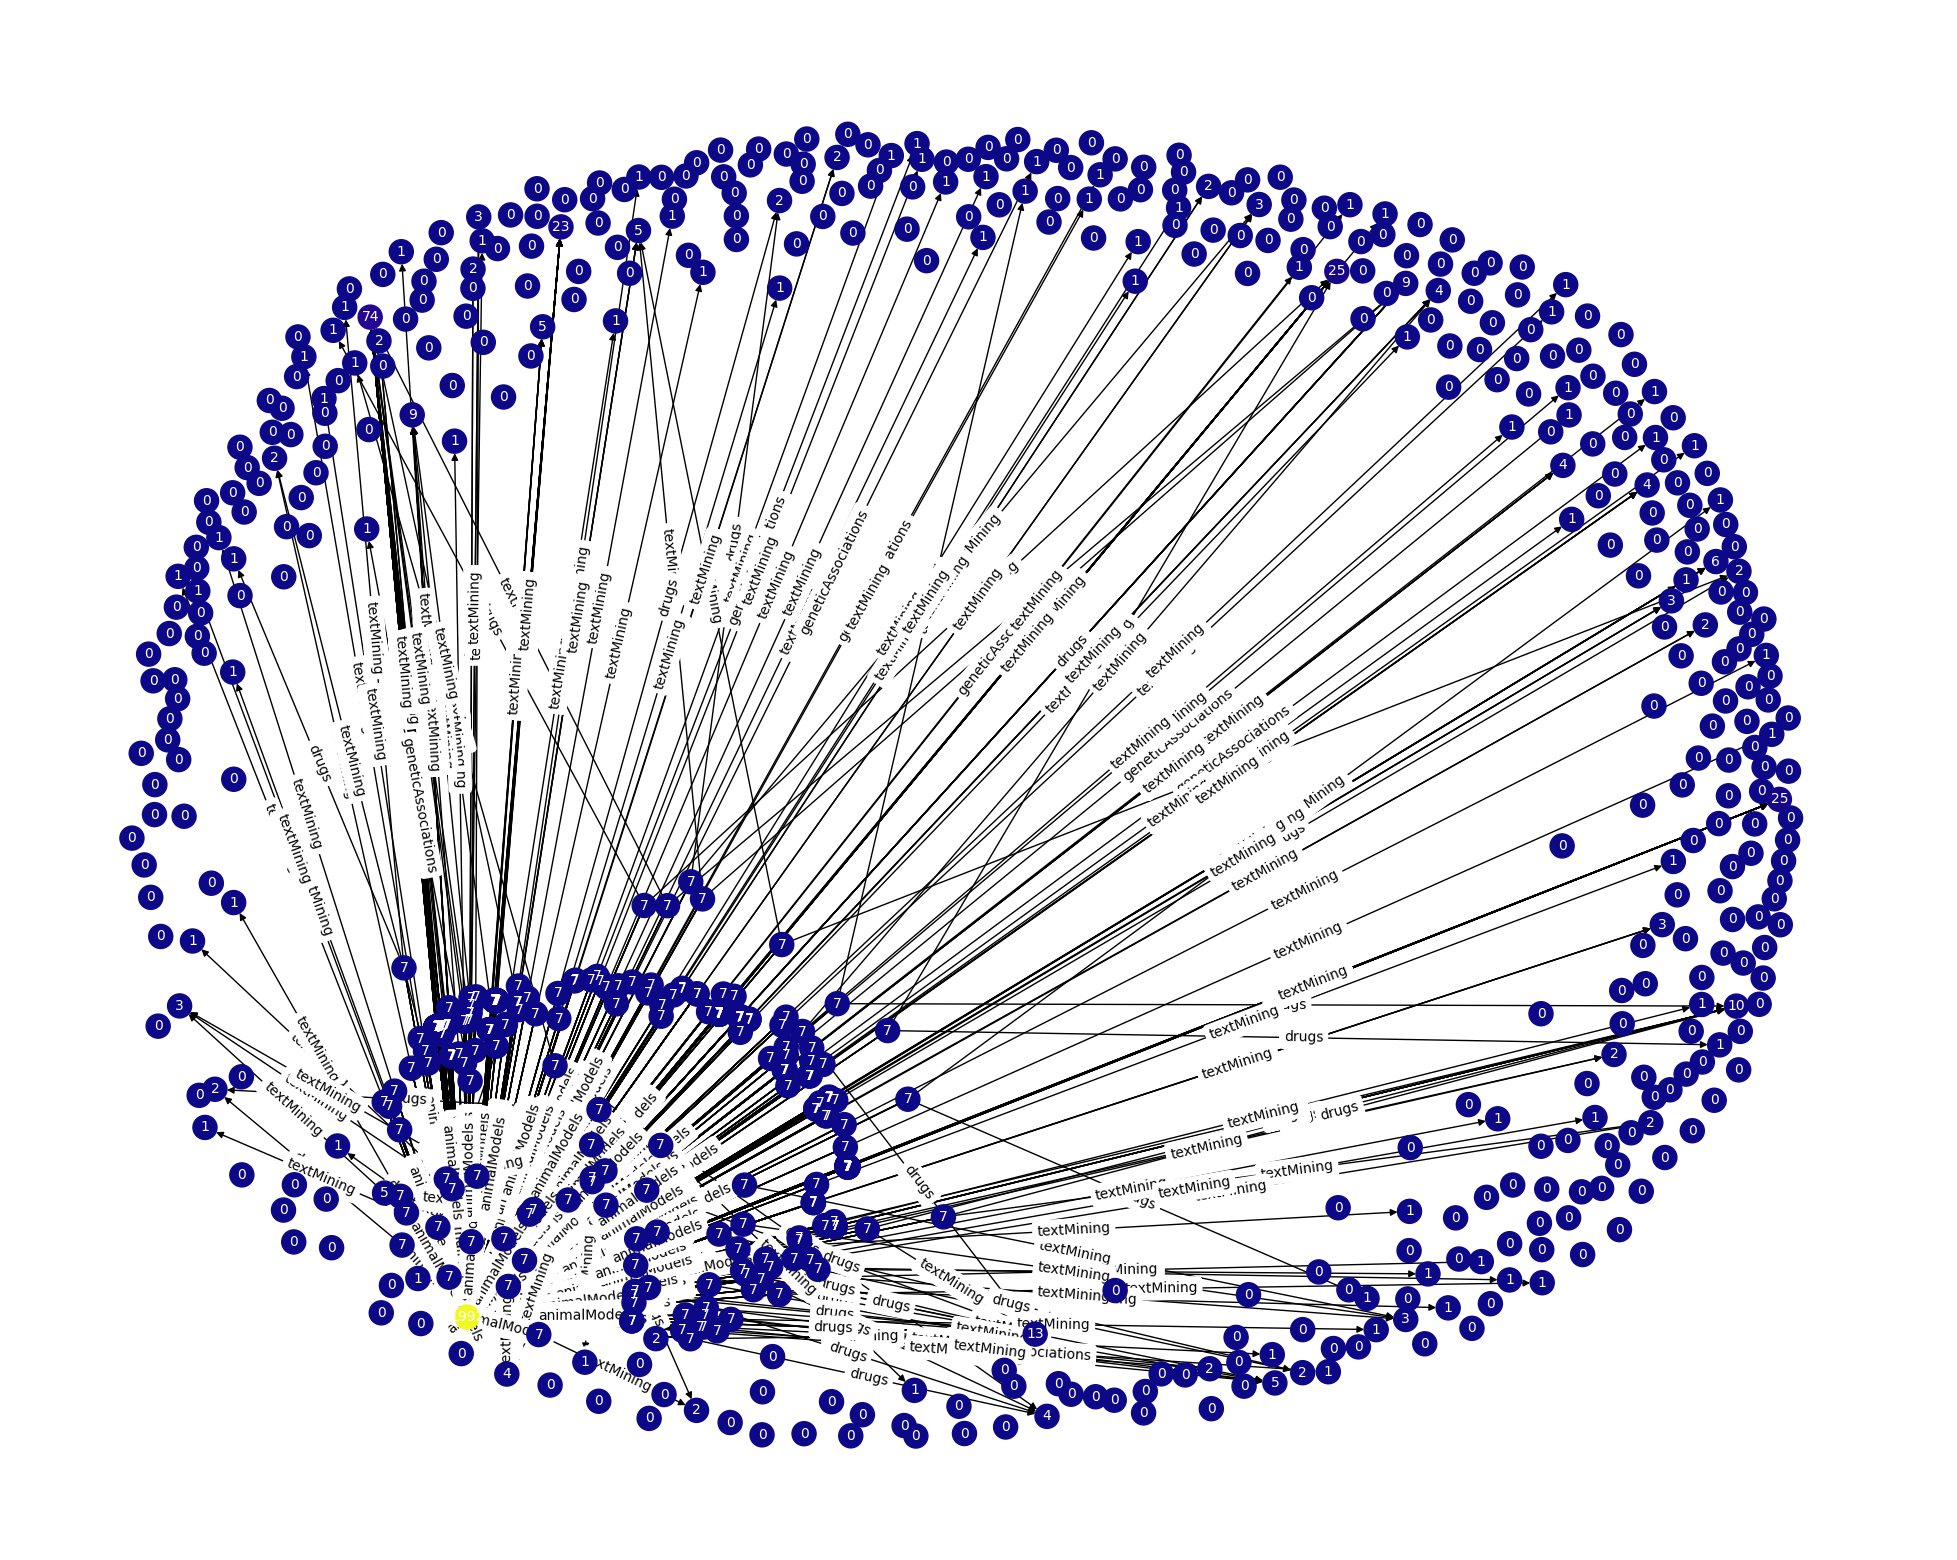

In [12]:
# Draw the graph
fig, ax = plt.subplots(figsize=(25, 20))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos,
                    node_color=list(degree.values()), cmap=cmap)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=degree,
                        font_size=10, font_color='white')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(
    u, v): d['association_type'] for u, v, d in G.edges(data=True)})
ax.axis('off')
plt.show()
